In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


In [2]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp36-none-any.whl size=7012 sha256=fa053af635b97e671c58217a8dbd66672842521eabd769d0672b5daefcea9864
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures


In [0]:
IMAGE_SIZE = (224, 224)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

In [0]:
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

90112/89181 [==============================] - 0s 3us/step


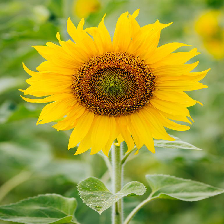

In [6]:
test_image = get_file('img.jpg','http://www.bruna.cat/imgdownload/full/130/1302237/sunflower-phone-wallpaper.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image

In [7]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

In [8]:
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

In [9]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

986

In [10]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


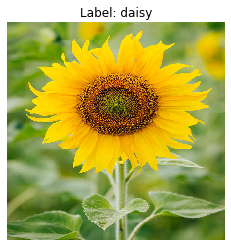

In [11]:
predicted_class_name = imagenet_labels[predicted_class]

plt.axis('off')
plt.title("Label: " + predicted_class_name, color = 'black')
plt.imshow(test_image)
plt.show()

In [0]:
class_names = ['minnie_mouse','mickey_mouse']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'minnie_mouse')  
train_im_dir = os.path.join(train_dir, 'mickey_mouse')  
validation_ca_dir = os.path.join(validation_dir, 'minnie_mouse') 
validation_im_dir = os.path.join(validation_dir, 'mickey_mouse')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)


  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()

      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return

In [0]:
img_dir = os.path.realpath('Images/')

In [15]:
queries = ['red','pink','drawing',' baby','disney']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='minnie mouse '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=minnie mouse red&source=lnms&tbm=isch
Total Time : 0:00:03.545346
Invalid image:  3.jpg cannot write mode RGBA as JPEG
Invalid image:  46.jpg cannot write mode RGBA as JPEG
Invalid image:  34.jpg cannot write mode RGBA as JPEG
Invalid image:  86.jpg cannot write mode RGBA as JPEG
Invalid image:  83.jpg cannot identify image file '/content/Images/83.jpg'
Invalid image:  54.jpg cannot write mode RGBA as JPEG
Invalid image:  95.jpg cannot identify image file '/content/Images/95.jpg'
Invalid image:  28.jpg cannot write mode RGBA as JPEG
Invalid image:  62.jpg cannot write mode RGBA as JPEG
Invalid image:  12.jpg cannot write mode RGBA as JPEG
Invalid image:  59.jpg cannot write mode RGBA as JPEG
Invalid image:  98.jpg cannot write mode P as JPEG
Invalid image:  69.jpg cannot write mode RGBA as JPEG
Invalid image:  79.jpg cannot identify image file '/content/Images/79.jpg'
https://www.google.co.in/search?q=minnie mouse pink&source=lnms&tbm=isch
Error  HTTPS

In [16]:
queries = ['red','birthday','drawing',' baby','disney']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='mickey mouse '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=mickey mouse red&source=lnms&tbm=isch
Total Time : 0:00:00.000343
Invalid image:  3.jpg cannot write mode RGBA as JPEG
Invalid image:  80.jpg cannot write mode RGBA as JPEG
Invalid image:  82.jpg cannot write mode P as JPEG
Invalid image:  63.jpg cannot write mode RGBA as JPEG
Invalid image:  67.jpg cannot identify image file '/content/Images/67.jpg'
Invalid image:  93.jpg cannot write mode P as JPEG
Invalid image:  98.jpg cannot write mode P as JPEG
Invalid image:  69.jpg cannot identify image file '/content/Images/69.jpg'
Invalid image:  2.jpg cannot write mode RGBA as JPEG
https://www.google.co.in/search?q=mickey mouse birthday&source=lnms&tbm=isch
Total Time : 0:00:02.900755
Invalid image:  89.jpg cannot write mode P as JPEG
Invalid image:  23.jpg cannot identify image file '/content/Images/23.jpg'
Invalid image:  84.jpg cannot identify image file '/content/Images/84.jpg'
Invalid image:  64.jpg cannot write mode RGBA as JPEG
Invalid image:  68.jpg 

In [17]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training Minnie Mouse images:', len(os.listdir(train_ca_dir)))
print('total training Mickey Mouse images:', len(os.listdir(train_im_dir)))

print('total validation Minnie Mouse images:', len(os.listdir(validation_ca_dir)))
print('total validation Mickey Mouse images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Minnie Mouse images: 395
total training Mickey Mouse images: 378
total validation Minnie Mouse images: 49
total validation Mickey Mouse images: 50
--
Total training images: 773
Total validation images: 99


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [19]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 773 images belonging to 2 classes.


In [20]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 99 images belonging to 2 classes.


In [0]:
image_batch, labels_batch = next(train_data_gen)

In [22]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [23]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['toyshop', 'hair slide', 'pick', 'soccer ball', 'envelope',
       'toyshop', 'menu', 'teddy', 'tricycle', 'stopwatch', 'jersey',
       'Band Aid', 'comic book', 'bonnet', 'envelope', 'pencil box',
       'packet', 'apron', 'sunglasses', 'bubble', 'puck', 'toyshop',
       'sunglass', 'rubber eraser', 'bib', 'pick', 'tricycle', 'sandal',
       'pencil sharpener', 'face powder', 'ladybug', 'tray'], dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

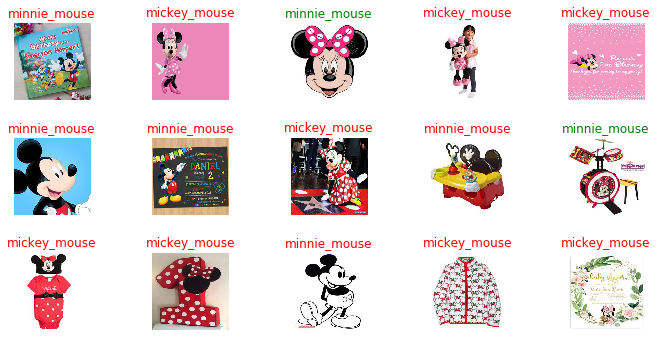

In [40]:
plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [31]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

In [33]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


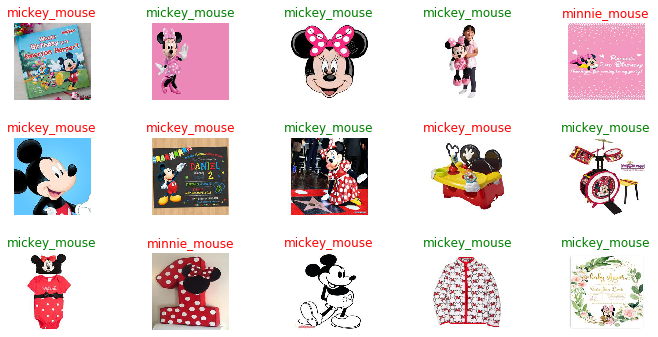

In [34]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/5
5/5 [==============================] - 39s 8s/step - loss: 1.3586 - accuracy: 0.5250 - val_loss: 0.7405 - val_accuracy: 0.6667
Epoch 2/5
5/5 [==============================] - 31s 6s/step - loss: 0.6776 - accuracy: 0.6767 - val_loss: 0.4926 - val_accuracy: 0.7576
Epoch 3/5
5/5 [==============================] - 35s 7s/step - loss: 0.4576 - accuracy: 0.8562 - val_loss: 0.4831 - val_accuracy: 0.7475
Epoch 4/5
5/5 [==============================] - 31s 6s/step - loss: 0.6766 - accuracy: 0.7143 - val_loss: 0.5472 - val_accuracy: 0.6768
Epoch 5/5
5/5 [==============================] - 35s 7s/step - loss: 0.3227 - accuracy: 0.9062 - val_loss: 0.5515 - val_accuracy: 0.6970


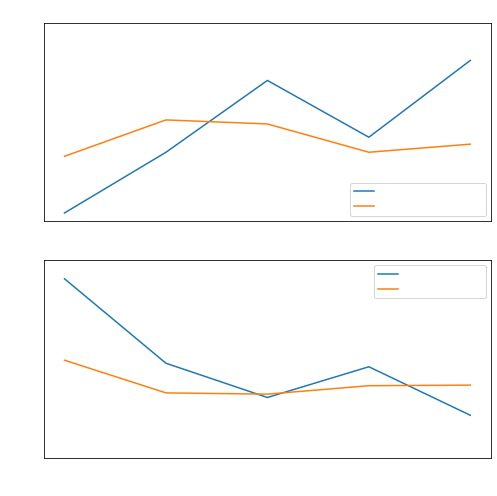

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

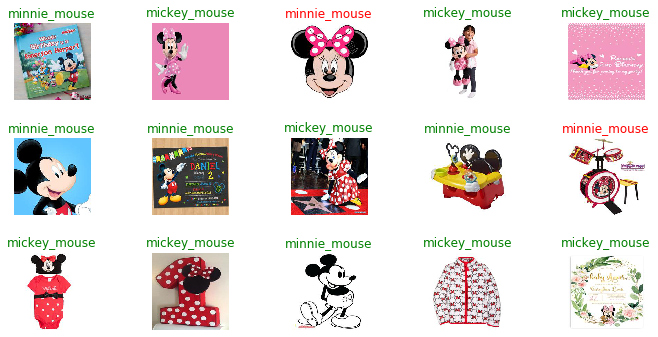

In [43]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)